# An Introduction to Bayesian Statistical Analysis

Before we jump in to model-building and using MCMC to do wonderful things, it is useful to understand a few of the theoretical underpinnings of the Bayesian statistical paradigm. A little theory (and I do mean a *little*) goes a long way towards being able to apply the methods correctly and effectively.

## What *is* Bayesian Statistical Analysis?

Though many of you will have taken a statistics course or two during your undergraduate (or graduate) education, most of those who have will likely not have had a course in *Bayesian* statistics. Most introductory courses, particularly for non-statisticians, still do not cover Bayesian methods at all, except perhaps to derive Bayes' formula as a trivial rearrangement of the definition of conditional probability. Even today, Bayesian courses are typically tacked onto the curriculum, rather than being integrated into the program.

In fact, Bayesian statistics is not just a particular method, or even a class of methods; it is an entirely different paradigm for doing statistical analysis.

> Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn.
*-- Gelman et al. 2013*

A Bayesian model is described by parameters, uncertainty in those parameters is described using probability distributions.

All conclusions from Bayesian statistical procedures are stated in terms of *probability statements*

![](images/prob_model.png)

This confers several benefits to the analyst, including:

- ease of interpretation, summarization of uncertainty
- can incorporate uncertainty in parent parameters
- easy to calculate summary statistics

## Bayesian vs Frequentist Statistics: What's the difference?

Any statistical paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*.
2. Some **data** which have been observed, and hopefully contain information about (1).
3. One or more **models** that relate the data to the parameters, and is the instrument that is used to learn.


## //Potential improvements:
1. include Bayes Rule explicitly
1. explain what an estimator is in Bayesian sense
1. work through example fully in both paradigms to make clear the differences
   - e.g. is the MAP of a Bayesian model the same as the unbiased frequentist estimator if the prior is uninformative?
   - in a worked coin-toss example, is the prior knowledge of the parameter (that it's 0-100%) included in the frequentist estimator?

### The Frequentist World View

![Fisher](images/fisher.png)

- The data that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model parameters are considered **fixed**. The parameters' values are unknown, but they are fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

$$f(y | \theta)$$

Here, the model $f$ accepts data values $y$ as an argument, conditional on particular values of $\theta$.

Frequentist inference typically involves deriving **estimators** for the unknown parameters. Estimators are formulae that return estimates for particular estimands, as a function of data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

> For example, lets say that we have collected some data on the prevalence of autism spectrum disorder (ASD) in some defined population. Our sample includes $n$ sampled children, $y$ of them having been diagnosed with autism. A frequentist estimator of the prevalence $p$ is:

> $$\hat{p} = \frac{y}{n}$$

> Why this particular function? Because it can be shown to be unbiased and minimum-variance.

It is important to note that new estimators need to be derived for every estimand that is introduced.

### The Bayesian World View

![Bayes](images/bayes.png)

- Data are considered **fixed**. They used to be random, but once they were written into your lab notebook/spreadsheet/Jupyter notebook they do not change.
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

$$p(\theta | y)$$

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

# Computational Methods in Bayesian Analysis

The process of conducting Bayesian inference can be broken down into three general steps (Gelman *et al.* 2013):

![](images/123.png)

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

### Step 2: Calculate a posterior distribution

The mathematical form $p(\theta | y)$ that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown $\theta$ *after* having observed $y$.

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?

## Example: binomial calculation

Binomial model is suitable for data that are generated from a sequence of exchangeable Bernoulli trials. These data can be summarized by $y$, the number of times the event of interest occurs, and $n$, the total number of trials. The model parameter is the expected proportion of trials that an event occurs.

$$p(Y=y|\theta,n) = \frac{n!}{y! (n-y)!} \theta^{y} (1-\theta)^{n-y}$$

where $y \in \{0, 1, \ldots, n\}$ and $\theta \in [0, 1]$.

To perform Bayesian inference, we require the specification of a prior distribution. A reasonable choice is a uniform prior on [0,1] which has two implications:

1. makes all probability values equally probable *a priori* 
2. makes calculation of the posterior easy

The second task in performing Bayesian inference is, given a fully-specified model, to calculate a posterior distribution. As we have specified the model, we can calculate a posterior distribution up to a proportionality constant (that is, a probability distribution that is **unnormalized**):

$$P(\theta | n, y) \propto P(y | n, \theta) P(\theta) = \theta^y (1-\theta)^{n-y}$$

We can present different posterior distributions as a function of different realized data.

We can also calculate posterior estimates for $\theta$ by maximizing the unnormalized posterior using optimization. 

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

p_range = np.linspace(0, 1, num=100, endpoint=False)

First, let's look at the prior distribution, which is just the uniform distribution between 0 and 1.

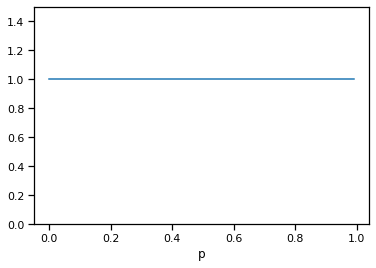

In [39]:
rv = stats.uniform()
plt.plot(p_range, rv.pdf(p_range));
plt.xlabel('p');
plt.ylim(0, 1.5);

For example, let's plot this unnormalized posterior for data comprising of 3 observed events from 5 trials:

In [41]:
def binomial_posterior(n, y):
    plt.plot(p_range, (p_range**y) * (1 - p_range)**(n-y))
    plt.xlabel('p');

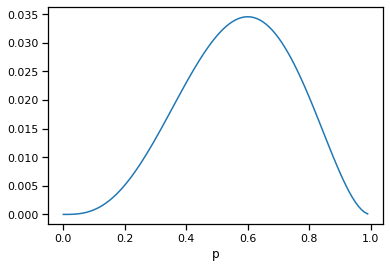

In [42]:
binomial_posterior(n=5, y=3)

What we see here is a function that characterizes the relatve evidence for different values of $p$, conditional on the assumed binomial model (with a uniform prior) and the observed data. Since the data are small, there is still reasonable support across the (0,1) range.

Let's increase the sample size to 12 events from 20 trials:

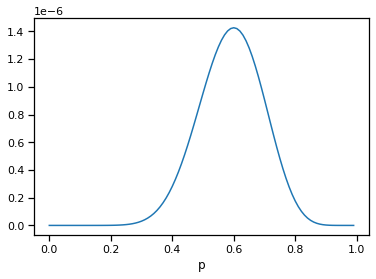

In [43]:
binomial_posterior(n=20, y=12)

And again to 1200 observations. Note that for this contrived example, the proportion of observed events is the same across sample sizes.

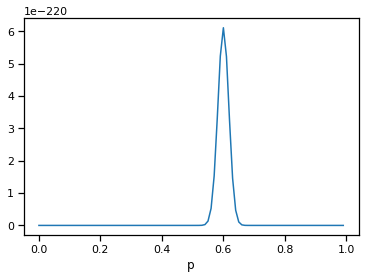

In [44]:
binomial_posterior(n=750, y=450)

So as the sample size gets large, the posterior narrows, representing the reduction in residual uncertainty. Notice also that the posterior distributions start to look more and more Gaussian!

# Proportion of emails that have attachments

Let's try an example from OrgSIM data: every email that is sent either has attachments or it does not. Each email is thus a Bernoulli trial, and the proportion of emails with attachments will be binomially distributed.

The underlying proportion can be estimated with a probabilistic model.

In [112]:
import pandas as pd
fpath_emails = '../data/synth_2020-07-23T225857.366811-emails.csv.gz'
fpath_emails_mult = '../data/synth_2020-07-29T144929.066431-emails.csv.gz'

df = pd.read_csv(fpath_emails)
df

,from,to,nrecipients,time,email_id,email_subject,recipient_type,has_attachment,date
0,Jordanne_Schofield@test-org.com,Ashlee_Webster@test-org.com,1,12:04:19,d7cdea7f,"And occultism experience, the",cc,False,2020-01-01
1,Jordanne_Schofield@test-org.com,Margo_Halliday@test-org.co.uk,1,14:45:09,3fee45b7,"Of visitors nods, leg movements etc. In differ...",to,False,2020-01-01
2,Jordanne_Schofield@test-org.com,Ashlee_Webster@test-org.com,1,11:41:41,9f474ffe,"RE: And occultism experience, the",to,False,2020-01-01
3,Jordanne_Schofield@test-org.com,Ashlee_Webster@test-org.com,1,11:51:02,f0e20da3,"RE: And occultism experience, the",to,False,2020-01-01
4,Jordanne_Schofield@test-org.com,Ella-Mai_Conrad@test-org.com,1,15:45:44,11a06341,Of funding and lakes. The Montana Act led to t...,to,False,2020-01-01
...,...,...,...,...,...,...,...,...,...
2066,Jordanne_Schofield@test-org.com,Margo_Halliday@test-org.co.uk,2,13:56:53,d4b2cc13,"RE: From similar, ultimately check the correct...",to,False,2020-01-20
2067,Jordanne_Schofield@test-org.com,Adina_Hall@test-org.com,2,13:56:53,d4b2cc13,"RE: From similar, ultimately check the correct...",to,False,2020-01-20
2068,Jordanne_Schofield@test-org.com,Margo_Halliday@test-org.co.uk,1,12:28:54,2b47b800,RE: The prevalence prepared in the recorded,to,False,2020-01-20
2069,Jordanne_Schofield@test-org.com,Graeme_Craig@test-org.com,1,11:53:11,44660fbd,Cats' feeding rise. The mean depth of nearly $...,to,False,2020-01-20


Let's first get our data into a simple form: each email is a record, and the value is whether there was an attachment or not:

In [115]:
df_attachments = df.groupby(['email_id'])['has_attachment'].max()
df_attachments.value_counts()

False    1937
True       15
Name: has_attachment, dtype: int64

# The frequentist approach


First, we use the estimator of $\hat{p} = \frac{y}{n}$ (as described above) to get a point estimate.

Then we could make the typical assumption of normality and use another estimator for variance. The variance estimator is a bit trickier as the sample standard deviation is a *biased* estimator of the population standard deviation.

NB: this might seem like a straw man, in the sense that it is entirely possible in a frequentist setting to use knowledge of the binomial distribution to construct theoretical intervals, rather than rely on the std estimator. However - this normality assumption and use of sample variance is very typical, and we will make the same assumption in the Bayesian model in order to keep things 'fair'.

In [117]:
print(f'{df_attachments.sum()} attachments for {len(df_attachments)} emails = {100 * df_attachments.mean():.2f}%')

15 attachments for 1952 emails = 0.77%


In [116]:
y = df_attachments.sum()
n = len(df_attachments)
p_hat = y/n
p_hat

0.007684426229508197

In [118]:
df_attachments.std()

0.08734577418422021

In [124]:
#TODO - this doesnt make much sense.

### The Bayesian approach

Now let's do this with a Bayesian approach:

Recall that the first step in Bayesian inference is specifying a **full probability model** for the problem.

This consists of:

- a likelihood function(s) for the observations
- priors for all unknown quantities

We can assume that each email is an independent event with regard to the attaching of files: given a certain 'propensity' to attach, attaching a file to one email in general won't affect my doing so with another. Therefore, we can assume that the count of attachments in a set of emails is binomially distributed.

$$y_i \sim B(p, n)$$

This implies that we have 1 unknown in the model: the proportion. The n will always be given.

#### Prior choice

How do we choose distributions to use as priors for this parameter? 

There are several considerations:

- discrete vs continuous values
- the support of the variable
- the available prior information

While there may likely be prior information about the distribution of email behaviour, we will assume little prior knowledge, and specify a **diffuse** prior for each parameter.

Since the proportion can take only values between 0 and 1, we will use a uniform:

$$\mu \sim U(0, 1)$$

We can encode these in a Python model, using the PyMC3 package, as follows:

First, the priors:

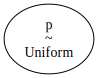

In [168]:
with pm.Model() as attachment_model:
    p = pm.Uniform('p', 0, 1.0)
pm.model_to_graphviz(attachment_model)

Then, the likelihood function.
We are not interested in variation of n, so we will just set that to

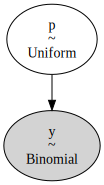

In [169]:
with attachment_model:
    y = pm.Binomial('y', p=p, n=len(df_attachments), observed=[df_attachments.sum()])
pm.model_to_graphviz(attachment_model)

In [170]:
with attachment_model:
    prior_pred = pm.sample_prior_predictive()

In [171]:
import arviz as az

with attachment_model:
    prior_inf_data = az.from_pymc3(prior=prior_pred)
prior_inf_data

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

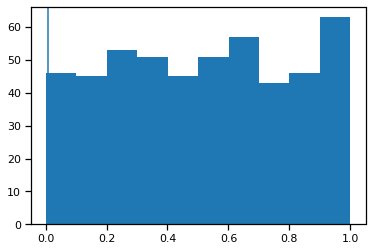

In [172]:
plt.hist(prior_pred['p'])
plt.axvline(df_attachments.mean())

In [173]:
with attachment_model:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.8830783401190224, but should be close to 0.8. Try to increase the number of tuning steps.


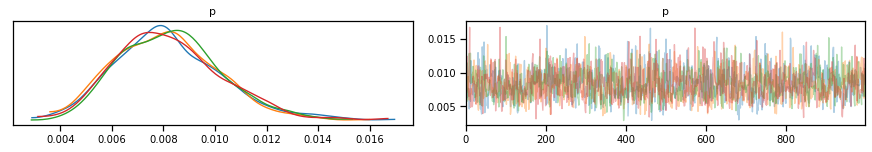

In [174]:
with attachment_model:
    pm.plot_trace(trace)

Now we happen to know that the real underlying rate of attachments is 1%, so plot that tas a reference

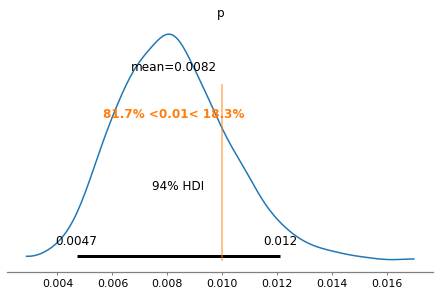

In [175]:
with attachment_model:
    pm.plot_posterior(trace, var_names='p', ref_val=0.01)

# Evaluating Hypotheses with Bayes

Statistical inference is a process of learning from incomplete or imperfect (error-contaminated) data. Can account for this "imperfection" using either a sampling model or a measurement error model.

### Statistical hypothesis testing

The *de facto* standard for statistical inference is statistical hypothesis testing. The goal of hypothesis testing is to evaluate a **null hypothesis**. There are two possible outcomes:

- reject the null hypothesis
- fail to reject the null hypothesis

Rejection occurs when a chosen test statistic is higher than some pre-specified threshold valuel; non-rejection occurs otherwise.

Notice that neither outcome says anything about the quantity of interest, the **research hypothesis**. 

Setting up a statistical test involves several subjective choices by the user that are rarely justified based on the problem or decision at hand:

- statistical test to use
- null hypothesis to test
- significance level

Choices are often based on arbitrary criteria, including "statistical tradition" (Johnson 1999). The resulting evidence is indirect, incomplete, and typically overstates the evidence against the null hypothesis (Goodman 1999).

Most importantly to applied users, the results of statistical hypothesis tests are very easy to misinterpret. 

### Estimation 

Instead of testing, a more informative and effective approach for inference is based on **estimation** (be it frequentist or Bayesian). That is, rather than testing whether two groups are different, we instead pursue an estimate of *how different* they are, which is fundamentally more informative. 

Additionally, we include an estimate of **uncertainty** associated with that difference which includes uncertainty due to our lack of knowledge of the model parameters (*epistemic uncertainty*) and uncertainty due to the inherent stochasticity of the system (*aleatory uncertainty*).

## One Group

Before we compare two groups using Bayesian analysis, let's start with an even simpler scenario: statistical inference for one group.

For this we will use an OrgSim data-set: a simulated series of emails.

In the first instance, it is all a single sender, and we are interested in estimating their average number of emails per day.

We will arbitrarily consider 90 emails a day to be the threshold of 'high output' and we want to test the hypothesis that this sender is a 'high output' individual.

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

THRESHOLD_HI_OUTPUT = 90

In [47]:
import pandas as pd
fpath_emails = '../data/synth_2020-07-23T225857.366811-emails.csv.gz'
df = pd.read_csv(fpath_emails)
df

,from,to,nrecipients,time,email_id,email_subject,recipient_type,has_attachment,date
0,Jordanne_Schofield@test-org.com,Ashlee_Webster@test-org.com,1,12:04:19,d7cdea7f,"And occultism experience, the",cc,False,2020-01-01
1,Jordanne_Schofield@test-org.com,Margo_Halliday@test-org.co.uk,1,14:45:09,3fee45b7,"Of visitors nods, leg movements etc. In differ...",to,False,2020-01-01
2,Jordanne_Schofield@test-org.com,Ashlee_Webster@test-org.com,1,11:41:41,9f474ffe,"RE: And occultism experience, the",to,False,2020-01-01
3,Jordanne_Schofield@test-org.com,Ashlee_Webster@test-org.com,1,11:51:02,f0e20da3,"RE: And occultism experience, the",to,False,2020-01-01
4,Jordanne_Schofield@test-org.com,Ella-Mai_Conrad@test-org.com,1,15:45:44,11a06341,Of funding and lakes. The Montana Act led to t...,to,False,2020-01-01
...,...,...,...,...,...,...,...,...,...
2066,Jordanne_Schofield@test-org.com,Margo_Halliday@test-org.co.uk,2,13:56:53,d4b2cc13,"RE: From similar, ultimately check the correct...",to,False,2020-01-20
2067,Jordanne_Schofield@test-org.com,Adina_Hall@test-org.com,2,13:56:53,d4b2cc13,"RE: From similar, ultimately check the correct...",to,False,2020-01-20
2068,Jordanne_Schofield@test-org.com,Margo_Halliday@test-org.co.uk,1,12:28:54,2b47b800,RE: The prevalence prepared in the recorded,to,False,2020-01-20
2069,Jordanne_Schofield@test-org.com,Graeme_Craig@test-org.com,1,11:53:11,44660fbd,Cats' feeding rise. The mean depth of nearly $...,to,False,2020-01-20


In [6]:
# first let's aggregate to the day level and just take the number of emails, disregarding all the other information for now

In [48]:
df_daily = df.groupby(['from', 'date'])['email_id'].nunique()
df_daily

from                             date      
Jordanne_Schofield@test-org.com  2020-01-01     95
                                 2020-01-02    115
                                 2020-01-03     96
                                 2020-01-04     88
                                 2020-01-05     97
                                 2020-01-06    110
                                 2020-01-07    102
                                 2020-01-08     90
                                 2020-01-09    107
                                 2020-01-10     93
                                 2020-01-11     92
                                 2020-01-12     96
                                 2020-01-13     77
                                 2020-01-14    106
                                 2020-01-15     90
                                 2020-01-16    113
                                 2020-01-17    114
                                 2020-01-18     78
                                 2020-

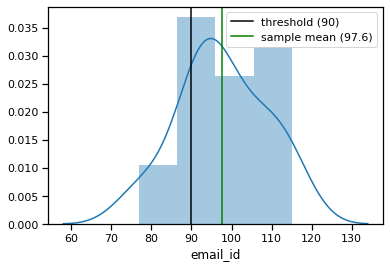

In [49]:
sns.distplot(df_daily);
plt.axvline(THRESHOLD_HI_OUTPUT, color='k', label='threshold (90)');
plt.axvline(df_daily.mean(), color='g', label=f'sample mean ({df_daily.mean()})');
plt.legend();

First, let's try to answer the question with a frequentist approach.
We start by assuming normality, and choosing a test: a t-test.

In [34]:
from pymc3 import Model, Normal, Uniform

with Model() as email_model:
    
    μ = Uniform('μ', 0, 1000)
    σ = Uniform('σ', 0, 100)

### The model

Recall that the first step in Bayesian inference is specifying a **full probability model** for the problem.

This consists of:

- a likelihood function(s) for the observations
- priors for all unknown quantities

To follow the assumption made above in the frequentist setting, let's start by assuming a normal distribution as the sampling distribution (likelihood) for the data. 

$$y_i \sim N(\mu, \sigma^2)$$

(don't worry, we can evaluate this assumption)

This implies that we have 2 unknowns in the model; the mean and standard deviation of the distribution. 

#### Prior choice

How do we choose distributions to use as priors for these parameters? 

There are several considerations:

- discrete vs continuous values
- the support of the variable
- the available prior information

While there may likely be prior information about the distribution of email behaviour, we will assume little prior knowledge, and specify a **diffuse** prior for each parameter.

Since the mean can take any reasonable positive real value, we will use a uniform with a large range, arbitrarily chosen:

$$\mu \sim U(0, 1000)$$

For the standard deviation, we know that the true value must be positive (no negative variances!). Choose a uniform prior bounded from below at zero and from above at a value that is sure to be higher than any plausible value the true standard deviation could take.

$$\sigma \sim U(0, 100)$$

We can encode these in a Python model, using the PyMC3 package, as follows:

In [51]:
from pymc3 import Model, Normal, Uniform

with Model() as email_model:
    
    μ = Uniform('μ', 0, 1000)
    σ = Uniform('σ', 0, 100)

> ## Software
> Today there is an array of software choices for Bayesians, including both open source software (*e.g.*, Stan, PyMC, Pyro, TensorFlow Probability) and commercial (*e.g.*, SAS, Stata). These examples can be replicated in any of these environments.

All that remains is to add the likelihood, which takes $\mu$ and $\sigma$ as parameters, and the log-radon values as the set of observations:

In [52]:
with email_model:
    dist = Normal('dist', mu=μ, sigma=σ, observed=df_daily)

In [54]:
email_model

In [55]:
import pymc3 as pm

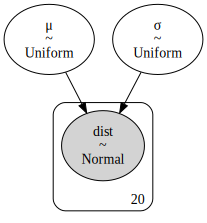

In [56]:
pm.model_to_graphviz(email_model)

Before we go ahead and estimate the model paramters from the data, it's a good idea to perform a **prior predictive check**. This involves sampling from the model before data are incorporated, and gives you an idea of the range of observations that would be considered reasonable within the scope of the modeling assumptions (including choice of priors). If the simnulations generate too many extreme observations relative to our expectations based on domain knowledge, then it can be an indication of problems with model formulation.

In [53]:
from pymc3 import sample_prior_predictive

with email_model:
    
    prior_sample = sample_prior_predictive(1000)

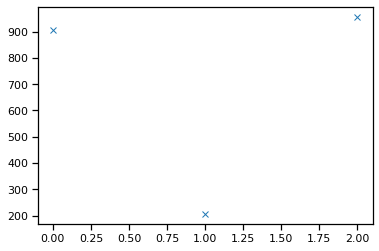

In [65]:
plt.plot(prior_sample['μ'].ravel()[0:3], 'x')

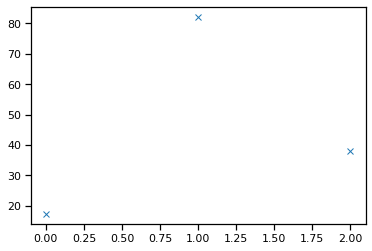

In [66]:
plt.plot(prior_sample['σ'].ravel()[0:3], 'x')

In [67]:
import scipy.stats as st

In [107]:
rv = st.norm(900, 18)
rv1 = st.norm(200, 82)

In [110]:
rv.rvs()

891.1801836228319

In [111]:
rv1.rvs()

197.26303793682763

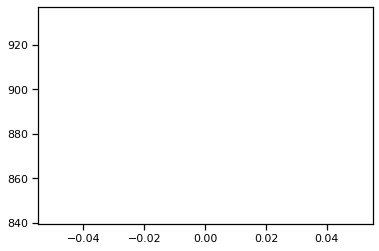

In [109]:
plt.plot(rv.rvs(1000))

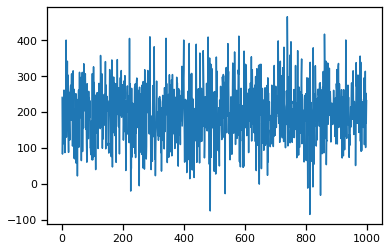

In [108]:
plt.plot(rv1.rvs(1000))

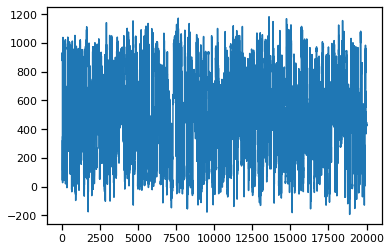

In [63]:
plt.plot(prior_sample['dist'].ravel())

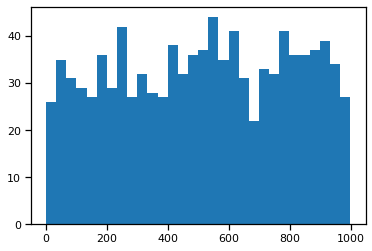

In [57]:
plt.hist(prior_sample['μ'].ravel(), bins=30);

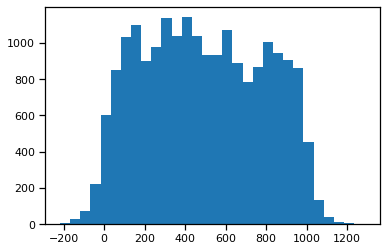

In [37]:
plt.hist(prior_sample['dist'].ravel(), bins=30);

(-200.0, 1200.0)

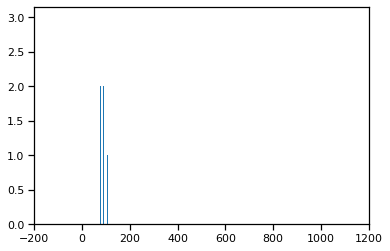

In [68]:
plt.hist(df_daily, bins=30);
plt.xlim(-200, 1200)

Now, we will fit the model using **Markov chain Monte Carlo (MCMC)**, which will be covered in detail in an upcoming section. This will draw samples from the posterior distribution (which cannot be calculated exactly).

In [69]:
from pymc3 import sample

with email_model:
    
    samples = sample(1000, tune=1000, cores=2, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.


/usr/local/anaconda3/envs/bayes_course_2020/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


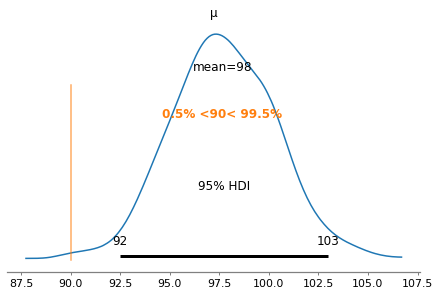

In [70]:
from arviz import plot_posterior

plot_posterior(samples, var_names=['μ'], ref_val=THRESHOLD_HI_OUTPUT, hdi_prob=0.95, kind='kde');

The plot shows the posterior distribution of $\mu$, along with an estimate of the 95% posterior **credible interval**. 

The output

    0.5% < 90 < 99.5%
    
informs us that the probability of $\mu$ being less than 90 is 0.5% and the corresponding probability of being greater than 90 is 99.5%.

> The posterior probability that the mean daily email count for this sender is greater than 90 is 99.5%.

In [ ]:
GOT TO HERE

### Prediction

What is the probability that a given household has a log-radon measurement larger than one? To answer this, we make use of the **posterior predictive distribution**.

$$p(z |y) = \int_{\theta} p(z |\theta) p(\theta | y) d\theta$$

where here $z$ is the predicted value and y is the data used to fit the model.

We can estimate this from the posterior samples of the parameters in the model.

In [13]:
mus = samples['μ']
sigmas = samples['σ']

In [14]:
radon_samples = Normal.dist(mus, sigmas).random()

In [15]:
(radon_samples > np.log(4)).mean()

0.462

> The posterior probability that a randomly-selected household in Henneprin County contains radon levels in excess of 4 pCi/L is about 0.46.

### Model checking

But, ***how do we know this model is any good?***

Its important to check the fit of the model, to see if its assumptions are reasonable. One way to do this is to perform **posterior predictive checks**. This involves generating simulated data using the model that you built, and comparing that data to the observed data.

One can choose a particular statistic to compare, such as tail probabilities or quartiles, but here it is useful to compare them graphically.

We already have these simulations from the previous exercise!

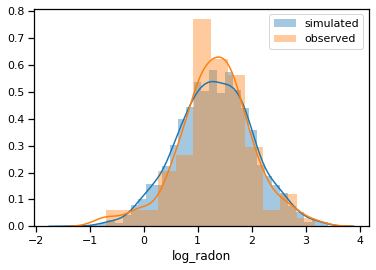

In [16]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()

### Exercise: Prior sensitivity

Its important to check the sensitivity of your choice of priors to the resulting inference. Specify the radon model using different priors for the mean and stanard deviation. [For reference, here is a link to the probability distributions API for PyMC3](https://docs.pymc.io/api/distributions.html), which lists the available distributions.

Think hard about the desirable properties of priors for each variable.

In [ ]:
from pymc3 import # Import distributions here

with Model() as prior_sensitivity:
    
    μ = ?
    σ = ?
    
    dist = Normal('dist', mu=μ, sigma=σ, observed=hennepin_radon)
    
    sensitivity_samples = sample(1000, tune=1000)

In [ ]:
plot_posterior(sensitivity_samples, var_names=['μ'], ref_val=np.log(4));

Here is the original model for comparison:

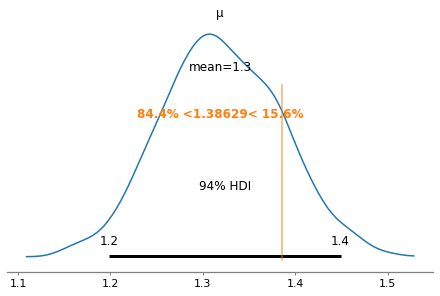

In [19]:
plot_posterior(samples, var_names=['μ'], ref_val=np.log(4));

## Two Groups with Continuous Outcome

To illustrate how this Bayesian estimation approach works in practice, we will use a fictitious example from Kruschke (2012) concerning the evaluation of a clinical trial for drug evaluation. The trial aims to evaluate the efficacy of a "smart drug" that is supposed to increase intelligence by comparing IQ scores of individuals in a treatment arm (those receiving the drug) to those in a control arm (those recieving a placebo). There are 47 individuals and 42 individuals in the treatment and control arms, respectively.

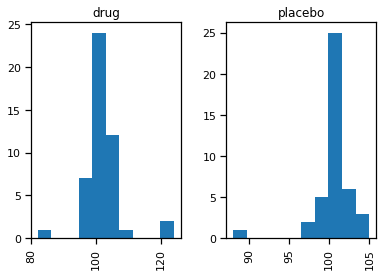

In [20]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),
                         group='drug'))
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),
                            group='placebo'))

trial_data = pd.concat([drug, placebo], ignore_index=True)
trial_data.hist('iq', by='group');

Since there appear to be extreme ("outlier") values in the data, we will choose a Student-t distribution to describe the distributions of the scores in each group. This sampling distribution adds **robustness** to the analysis, as a T distribution is less sensitive to outlier observations, relative to a normal distribution. 

The three-parameter Student-t distribution allows for the specification of a mean $\mu$, a precision (inverse-variance) $\lambda$ and a degrees-of-freedom parameter $\nu$:

$$f(x|\mu,\lambda,\nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})} \left(\frac{\lambda}{\pi\nu}\right)^{\frac{1}{2}} \left[1+\frac{\lambda(x-\mu)^2}{\nu}\right]^{-\frac{\nu+1}{2}}$$
           
the degrees-of-freedom parameter essentially specifies the "normality" of the data, since larger values of $\nu$ make the distribution converge to a normal distribution, while small values (close to zero) result in heavier tails.

Thus, the likelihood functions of our model are specified as follows:

$$\begin{align}
y^{(drug)}_i &\sim T(\nu, \mu_1, \sigma_1) \\
y^{(placebo)}_i &\sim T(\nu, \mu_2, \sigma_2)
\end{align}$$

As a simplifying assumption, we will assume that the degree of normality $\nu$ is the same for both groups. 

### Prior choice

Since the means are real-valued, we will apply normal priors. Since we know something about the population distribution of IQ values, we will center the priors at 100, and use a standard deviation that is more than wide enough to account for plausible deviations from this population mean:

$$\mu_k \sim N(100, 10^2)$$

In [21]:
with Model() as drug_model:
    
    μ_0 = Normal('μ_0', 100, sigma=10)
    μ_1 = Normal('μ_1', 100, sigma=10)

Similarly, we will use a uniform prior for the standard deviations, with an upper bound of 20.

In [22]:
with drug_model:
    σ_0 = Uniform('σ_0', lower=0, upper=20)
    σ_1 = Uniform('σ_1', lower=0, upper=20)

For the degrees-of-freedom parameter $\nu$, we will use an **exponential** distribution with a mean of 30; this allocates high prior probability over the regions of the parameter that describe the range from normal to heavy-tailed data under the Student-T distribution.

In [23]:
from pymc3 import Exponential

with drug_model:
    ν = Exponential('ν_minus_one', 1/29.) + 1


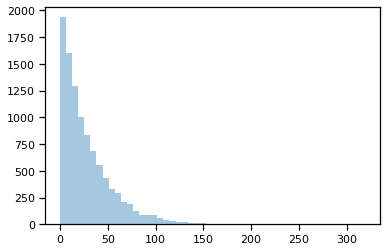

In [24]:
sns.distplot(Exponential.dist(1/29).random(size=10000), kde=False);

In [25]:
from pymc3 import StudentT

with drug_model:

    drug_like = StudentT('drug_like', nu=ν, mu=μ_1, lam=σ_1**-2, observed=drug.iq)
    placebo_like = StudentT('placebo_like', nu=ν, mu=μ_0, lam=σ_0**-2, observed=placebo.iq)

Now that the model is fully specified, we can turn our attention to tracking the posterior quantities of interest. Namely, we can calculate the difference in means between the drug and placebo groups.

As a joint measure of the groups, we will also estimate the "effect size", which is the difference in means scaled by the pooled estimates of standard deviation. This quantity can be harder to interpret, since it is no longer in the same units as our data, but it is a function of all four estimated parameters.

In [26]:
from pymc3 import Deterministic

with drug_model:
    
    diff_of_means = Deterministic('difference of means', μ_1 - μ_0)
    
    effect_size = Deterministic('effect size', 
                        diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))



In [27]:
with drug_model:
    
    drug_trace = sample(1000, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν_minus_one, σ_1, σ_0, μ_1, μ_0]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 14 seconds.
The acceptance probability does not match the target. It is 0.7034689607965747, but should be close to 0.8. Try to increase the number of tuning steps.


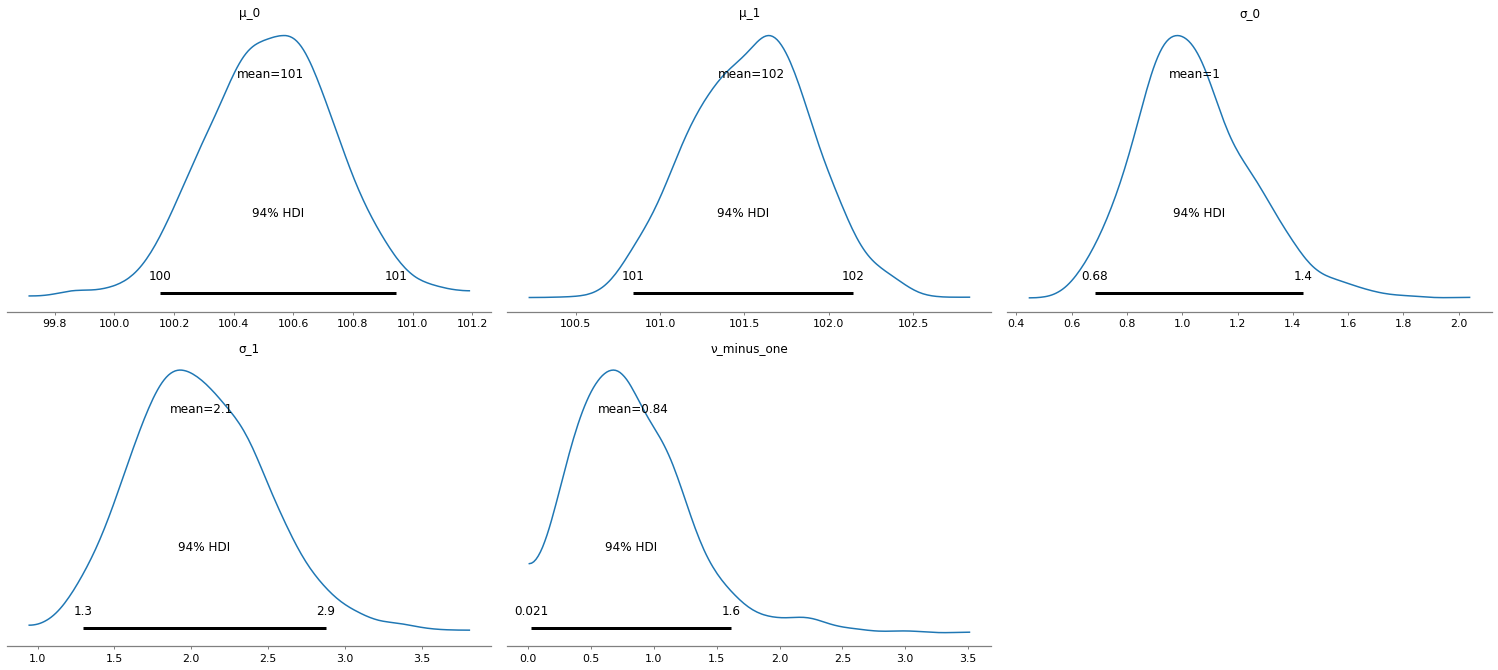

In [28]:
plot_posterior(drug_trace[100:], var_names=['μ_0', 'μ_1', 'σ_0', 'σ_1', 'ν_minus_one']);

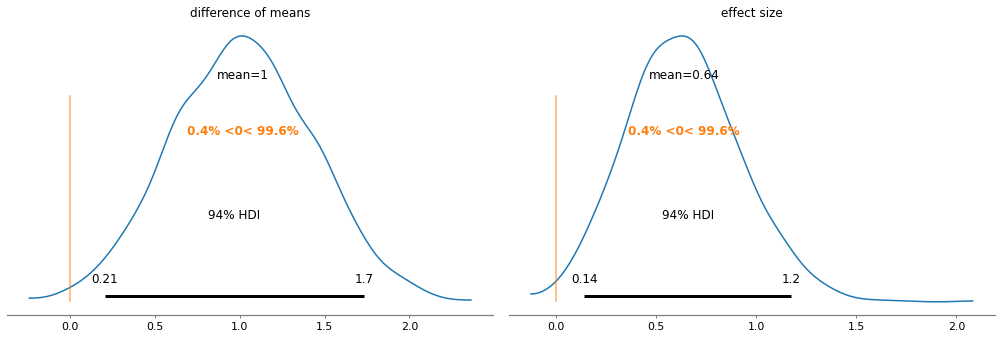

In [29]:
plot_posterior(drug_trace[100:], 
          var_names=['difference of means', 'effect size'],
          ref_val=0);

> The posterior probability that the mean IQ of subjects in the treatment group is greater than that of the control group is 0.99.

---

# References

Gelman, Andrew, John B. Carlin, Hal S. Stern, David B. Dunson, Aki Vehtari, and Donald B. Rubin. 2013. Bayesian Data Analysis, Third Edition. CRC Press.

Pilon, Cam-Davidson. [Probabilistic Programming and Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)